In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, ticker
from matplotlib.colors import Normalize

from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from sklearn.manifold import TSNE

In [2]:
df_fake = pd.read_csv('data/Fake.csv')
df_true = pd.read_csv('data/True.csv')

In [3]:
display('Fake df', df_fake.head(), 'True df', df_true.head())

'Fake df'

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


'True df'

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake['target'] = 0
df_true['target'] = 1

In [5]:
df = pd.concat([df_fake, df_true], ignore_index=True)
df.sample(5)

,title,text,subject,date,target
41359,Soon-to-go-free jail convicts snared in French...,PARIS (Reuters) - Two French prison inmates wh...,worldnews,"October 10, 2017",1
24970,Supreme Court's Gorsuch criticized over Trump ...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"September 28, 2017",1
41808,"Prankster, coughing fits mar Theresa May’s spe...","MANCHESTER, England (Reuters) - British Prime ...",worldnews,"October 3, 2017",1
29699,New Zealand's Xero chairman resigns after acce...,WELLINGTON (Reuters) - New Zealand accounting ...,politicsNews,"January 19, 2017",1
6552,Sarah Palin Just Sent A Truly Idiotic Message...,Now that Ted Cruz has dropped out of the presi...,News,"May 4, 2016",0


In [6]:
df_text = df.drop(['subject', 'date'], axis=1)
df_text.sample(5)

,title,text,target
28966,Kremlin says Putin-Trump meeting possible befo...,MOSCOW (Reuters) - The Kremlin said on Monday ...,1
24304,Democratic leader vows fair nomination process...,WASHINGTON (Reuters) - The head of the Democra...,1
12964,BREAKING: FEMALE LAW STUDENT Busts Hillary’s “...,Will this FINALLY be the straw that breaks the...,0
8903,Watch Trump Fans Attack Peaceful Protesters H...,Two completely peaceful protesters were attack...,0
14538,[VIDEO] “Low Energy” Jeb Bush Asks NH Audience...,The sad and almost pathetic end of the Bush dy...,0


In [7]:
df_text[['title', 'text']]

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...
...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...


In [8]:
texts = ''
try:
    for i in range(len(df_text)):
        if i % 1000 == 0:
            print(f"Iteration: {i}, len texts: {len(texts)}")
        texts += df_text['title'].loc[i] + ' ' + df_text['text'].loc[i]
except KeyboardInterrupt:
    print('Принудительно остановленно')

Iteration: 0, len texts: 0
Iteration: 1000, len texts: 2579958
Iteration: 2000, len texts: 5199630
Iteration: 3000, len texts: 8026604
Iteration: 4000, len texts: 10810016
Принудительно остановленно


In [9]:
# Replaces escape character with space
texts = texts.replace("\n", " ") 
data_for_w2v = []

In [10]:
# Итерируемся по каждому предложению в фалйе
for i in sent_tokenize(texts):
    temp = []
     
    # Токенизируем предложения в слова
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data_for_w2v.append(temp)

In [12]:
# Create CBOW model
model1 = Word2Vec(data_for_w2v, min_count = 10, vector_size = 20, window = 10)

In [13]:
print(len(model1.wv.key_to_index))
#model1.wv.key_to_index

9692


In [ ]:
model1.train(data_for_w2v, total_examples=model1.corpus_count, epochs=30, report_delay=1)

(43766938, 63096120)

In [ ]:
model1.wv.most_similar(positive=['trump'])

[('donald', 0.8243646025657654),
 ('himself', 0.8077313303947449),
 ('his', 0.742468535900116),
 ('criticism', 0.7372016310691833),
 ('he', 0.7250531315803528),
 ('twitter', 0.6921409964561462),
 ('childish', 0.686462938785553),
 ('it.trump', 0.6805337071418762),
 ('president-elect', 0.6548705101013184),
 ('mcenany', 0.6512993574142456)]

In [ ]:
df_test = df_text.groupby(by='target', as_index=False).head(500).reset_index(drop=True).copy(deep=True)
df_test

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
995,"Factbox: Trump on Twitter (Nov. 28) - NFL, Fir...",The following statements were posted to the ve...,1
996,Consumer agency official English says will be ...,"WASHINGTON (Reuters) - Leandra English, who is...",1
997,U.S. Sen. Warren predicts appeal in legal batt...,WASHINGTON (Reuters) - U.S. Senator Elizabeth ...,1
998,Top two Republicans in Congress challenge Demo...,WASHINGTON (Reuters) - The top two Republicans...,1


In [ ]:
df_test['full_text'] = df_test.apply(lambda x: x.title + ' ' + x.text, axis=1)
df_test

,title,text,target,full_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
995,"Factbox: Trump on Twitter (Nov. 28) - NFL, Fir...",The following statements were posted to the ve...,1,"Factbox: Trump on Twitter (Nov. 28) - NFL, Fir..."
996,Consumer agency official English says will be ...,"WASHINGTON (Reuters) - Leandra English, who is...",1,Consumer agency official English says will be ...
997,U.S. Sen. Warren predicts appeal in legal batt...,WASHINGTON (Reuters) - U.S. Senator Elizabeth ...,1,U.S. Sen. Warren predicts appeal in legal batt...
998,Top two Republicans in Congress challenge Demo...,WASHINGTON (Reuters) - The top two Republicans...,1,Top two Republicans in Congress challenge Demo...


In [ ]:
def get_tokenize_text(text: str):
    # Итерируемся по каждому предложению в фалйе
    out = []
    for i in sent_tokenize(texts):
        temp = []
        # Токенизируем предложения в слова
        for j in word_tokenize(i):
            temp.append(j.lower())
        out.append(temp)
    
    return out

In [ ]:
def vectorize_with_target(data_: pd.DataFrame):

    output = []

    for i in range(len(data_)):
        row = data_.loc[i]
        text = row['full_text'].lower()
        target = row['target']

        tokenized_text = word_tokenize(text)
         
        vector = np.zeros(20)
        i = 0
        for word in tokenized_text:
            try:
                vector += model1.wv.get_vector(word)
            except:
                i += 1

        print(f'count non vectorized words:{i}')
        #print(vector)
        output.append([vector, target])

    return output

In [ ]:
vectors = vectorize_with_target(df_test[['full_text', 'target']])

count non vectorized words:36
count non vectorized words:18
count non vectorized words:70
count non vectorized words:44
count non vectorized words:19
count non vectorized words:16
count non vectorized words:17
count non vectorized words:22
count non vectorized words:27
count non vectorized words:14
count non vectorized words:12
count non vectorized words:17
count non vectorized words:17
count non vectorized words:14
count non vectorized words:36
count non vectorized words:13
count non vectorized words:68
count non vectorized words:17
count non vectorized words:16
count non vectorized words:53
count non vectorized words:29
count non vectorized words:26
count non vectorized words:14
count non vectorized words:9
count non vectorized words:12
count non vectorized words:12
count non vectorized words:17
count non vectorized words:38
count non vectorized words:26
count non vectorized words:39
count non vectorized words:36
count non vectorized words:26
count non vectorized words:28
count non v

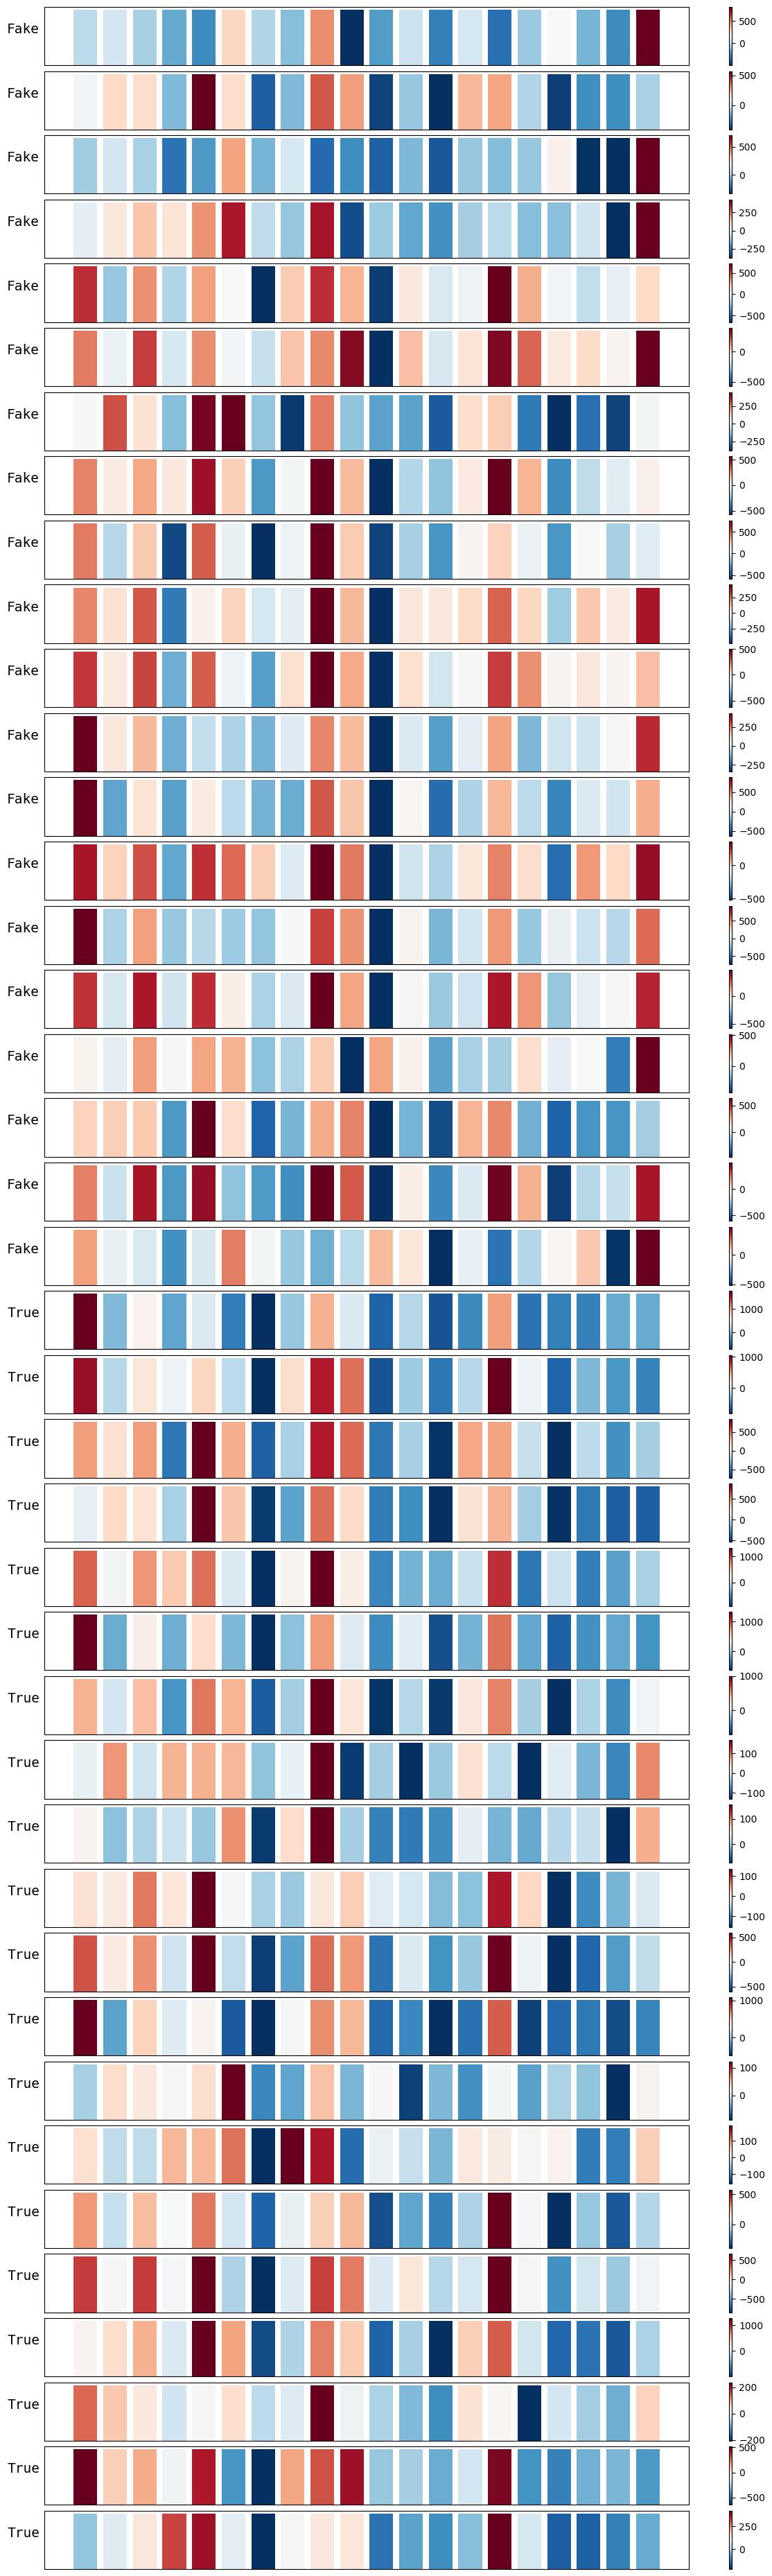

In [ ]:
%matplotlib inline

fig, axs = plt.subplots(nrows=len(vectors), ncols=1, figsize=(15, len(vectors)*1.2))
plt.subplots_adjust(hspace=0.1)
#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 3))
i = 0
for vec, tar in vectors:
    
    ax = axs[i]
    cmap = 'RdBu_r'

    norm = Normalize(min(vec), max(vec))
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)

    my_cmap = sm.get_cmap()
    colors = my_cmap(norm(vec))

    ax.bar(x=range(len(vec)), height=1, color=colors)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axes.xaxis.set_tick_params(bottom = False)
    ax.axes.yaxis.set_tick_params(bottom = False)

    ax.set_ylabel(f"{'True' if tar else 'Fake'}", 
                  rotation=0, 
                  fontfamily='monospace', 
                  fontsize=14,
                  labelpad=15)  
    
    cbar = fig.colorbar(sm, ax=ax)
    i += 1
plt.show()

In [ ]:
to_tsne = None
targets = []
for vec, tar in vectors:
    targets.append(tar)
    vec = np.array([vec])
    if to_tsne is None:
        to_tsne = vec
    else:
        to_tsne = np.append(to_tsne, vec, axis=0)
targets = np.array(targets)

to_tsne, targets

(array([[ -21.43404685,   37.58486111,  -62.2643466 , ..., -148.69465268,
         -258.61121744,  811.64999464],
        [  65.71782486,  179.72657052,  174.64620529, ..., -214.84939189,
         -215.70343496,  -75.23362364],
        [  -1.64961045,   87.72719216,   13.25411371, ..., -329.11196833,
         -335.39442514,  701.48588734],
        ...,
        [ 189.41471918,  -82.99378589,  102.84154879, ...,  -71.53986368,
         -212.82044894, -108.5706724 ],
        [ 344.64563591,  -45.31972267,   45.34763063, ...,    4.06100912,
          -56.67186268,   -5.11301636],
        [1071.18100666,  -51.98233467,  322.34904439, ..., -316.25859105,
         -158.96477248,  -29.81907   ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

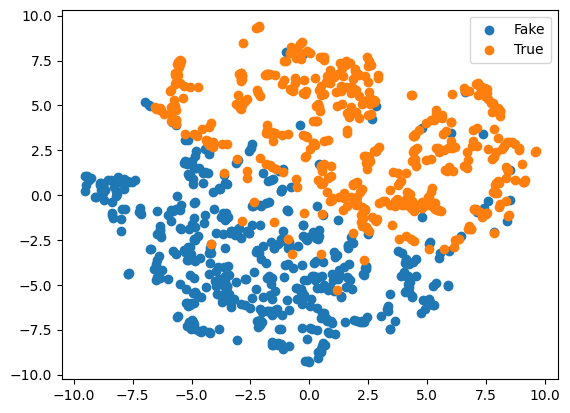

In [ ]:
vectors_2d = TSNE(n_components=2, learning_rate=0.1, init='random', random_state=42, perplexity=10).fit_transform(to_tsne)

x = vectors_2d[:,0]
y = vectors_2d[:,1]
for i in range(2):
    plt.scatter(x=x[np.where(np.array(targets) == i)[0]], 
                y=y[np.where(np.array(targets) == i)[0]], 
                label=f"{'True' if i == 1 else 'Fake'}")

# texts = []
# for label, x_, y_ in zip(targets, x, y):
#     t = plt.annotate(label, xy=(x_, y_))
#     texts.append(t)

plt.legend()
plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchmetrics import Accuracy
from torch.utils.data import Dataset, DataLoader


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
EPOCHS = 10
LEARNING_RATE = 0.001

network = CNN()
loss = torch.nn.BCEWithLogitsLoss()
accuracy = Accuracy(task='binary')
optimizer = optim.Adam(network.parameters(), lr=LEARNING_RATE)


step = 0
for epoch in range(EPOCHS):
    
    network.train()
    for features, label in train_loader:
        # Reset gradients
        optimizer.zero_grad()
        output = network(features).squeeze(dim=1)
            
        # Calculate error and backpropagate
        loss = loss(output, label)
        output = torch.sigmoid(output)
        loss.backward()                
        acc = accuracy(output.detach().cpu(), torch.tensor(label, dtype=torch.int64)).item()
        
        # Update weights with gradients
        optimizer.step()
        step += 1

        if step % 50 == 0:
            print('\nEPOCH %d STEP %d : train_loss: %f train_acc: %f' %(epoch, step, loss.item(), acc))

    # Run validation
    running_loss = []
    valid_scores = []
    valid_labels = []
    network.eval()
    with torch.no_grad():
        for features, label in valid_loader:
            output = network(features)
            # Calculate error and backpropagate
            try:
                loss = loss(output.squeeze(), label)
            except ValueError:
                print(output, label)
            
            running_loss.append(loss.item())
            valid_scores.extend(output)
            valid_labels.extend(label)

    valid_accuracy = accuracy(torch.tensor(valid_scores), torch.tensor(valid_labels)).item()
    print('valid_loss: %f valid_acc: %f' % (np.mean(running_loss), valid_accuracy))



In [ ]:
class TrainLoop:
    
    gay_features = None
    norm_features = None
    
    def __init__(self):
        
        #TRAIN
        self.train_dataset = CustomDataset(TRAIN_PATH)
        self.train_loader = DataLoader(dataset=self.train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
        
        #VALID
        self.valid_dataset = CustomDataset(VALID_PATH)
        self.valid_loader = DataLoader(dataset=self.valid_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
        
        self.build_model()
        return

    def build_model(self):
        
        self.input_size = len(self.train_dataset.numeric_columns) + len(self.train_dataset.embedding_columns) * EMBEDDING_SIZE
        
        self.network = TabNet(input_size=self.input_size, 
                              output_size=1,
                              batch_size = BATCH_SIZE,
                              nrof_cat=self.train_dataset.nrof_emb_categories,
                              emb_dim=EMBEDDING_SIZE,
                              emb_columns=self.train_dataset.embedding_columns,
                              numeric_columns=self.train_dataset.numeric_columns,
                              n_steps=TABNET_STEPS,
                              n_a=N_A,
                              n_d=N_D,
                              nrof_glu=NROF_GLU)
        
        self.loss = torch.nn.BCEWithLogitsLoss()
        self.accuracy = Accuracy(task='binary')
        self.optimizer = optim.Adam(self.network.parameters(), lr=LEARNING_RATE)
        return

    def load_model(self, restore_path=''):
        if restore_path == '':
            self.step = 0
        else:
            pass
        return

    def run_train(self):
        print('Run train ...')
        self.load_model()
        for epoch in range(EPOCHS):
            self.network.train()
            
            for features, label in self.train_loader:
                # Reset gradients
                self.optimizer.zero_grad()
                output = self.network(features).squeeze(dim=1)
                    
                # Calculate error and backpropagate
                loss = self.loss(output, label)
                output = torch.sigmoid(output)
                loss.backward()                
                acc = self.accuracy(output.detach().cpu(), torch.tensor(label, dtype=torch.int64)).item()
                
                # Update weights with gradients
                self.optimizer.step()
                self.train_writer.add_scalar('Loss_train_tabnet', loss, self.step)
                self.train_writer.add_scalar('Accuracy_train_tabnet', acc, self.step)
                self.step += 1

                if self.step % 50 == 0:
                    print('\nEPOCH %d STEP %d : train_loss: %f train_acc: %f' %(epoch, self.step, loss.item(), acc))
            
            # Run validation
            running_loss = []
            valid_scores = []
            valid_labels = []
            self.network.eval()
            with torch.no_grad():
                for features, label in self.valid_loader:
                    output = self.network(features)
                    # Calculate error and backpropagate
                    try:
                        loss = self.loss(output.squeeze(), label)
                    except ValueError:
                        print(output, label)
                    
                    running_loss.append(loss.item())
                    valid_scores.extend(output)
                    valid_labels.extend(label)

            valid_accuracy = self.accuracy(torch.tensor(valid_scores), torch.tensor(valid_labels)).item()

            self.valid_writer.add_scalar('Loss_valid_tabnet', np.mean(running_loss), self.step)
            self.valid_writer.add_scalar('Accuracy_valid_tabnet', valid_accuracy, self.step)

            print('valid_loss: %f valid_acc: %f' % (np.mean(running_loss), valid_accuracy))
            
        return